# Solve the Field Equation

In [8]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import scipy.constants as c

import axion_mass
from config import model
import g_star
import time_temp
import T_osc_solver
import eom_solver

/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in log
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a


CPU times: user 2.9 s, sys: 10.3 ms, total: 2.91 s
Wall time: 2.91 s
T_osc = 984112560.444


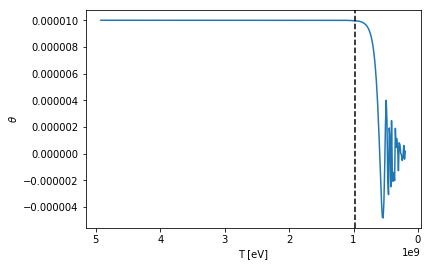

In [2]:
f_a = 1e12 * 1e9
m_a_fn = axion_mass.m_a_from_chi_general
g_model = g_star.borsamyi_table
theta_i = 1e-5
%time T, phi = eom_solver.sim_axion_field_evo_T(theta_i, f_a, m_a_fn, g_model)
plt.plot(T, phi)
plt.xlabel("T [eV]")
plt.ylabel(r"$\theta$")
T_osc = T_osc_solver.find_T_osc(f_a, m_a_fn, g_model)
plt.axvline(T_osc, color="black", linestyle="--")
print("T_osc =", T_osc)
plt.gca().invert_xaxis()

In [73]:
eom_solver = importlib.reload(eom_solver)
T, theta, dthetadT = eom_solver.find_axion_field_osc_vals(theta_i, f_a, m_a_fn, g_model, avg_stop=0.6)

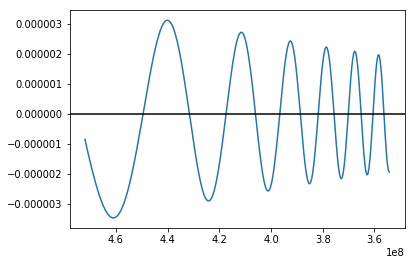

In [74]:
plt.plot(T, theta)
plt.gca().invert_xaxis()
plt.axhline(0, color="black")

In [42]:
inte.ode?